# Matplotlib - Maillage triangulaire 2D
Que faire quand les noeuds n'échantillonnage ne sont pas sur une grille?

## triangulation
On désire tracer le maillage obtenu par triangulation d\'un ensemble
de points répartis aléatoirement dans le plan (x,y)

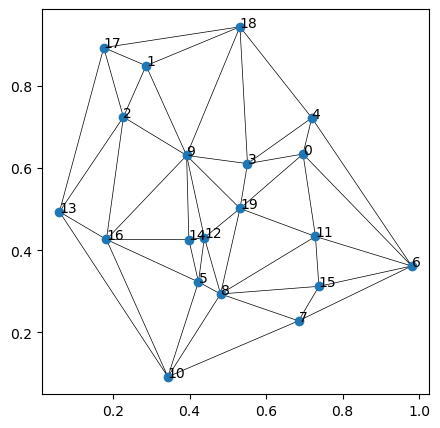

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.tri as tri

plt.close('all') #efface fenêtre graphique

N=20
np.random.seed(123)
x=np.random.rand(N)
y=np.random.rand(N)

triang = tri.Triangulation(x, y)
plt.figure(figsize=(5, 5))
plt.triplot(triang, lw=0.5, color='black')
plt.plot(x, y, 'o')
for i in range(N):
    plt.text(x[i], y[i], str(i))

plt.show()

## Isovaleurs
On désire tracer les isovaleurs d'une fonction échantillonnée aux noeuds d'un maillage triangulaire

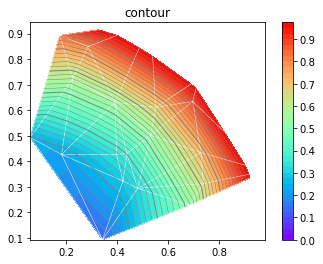

In [2]:
from matplotlib import cm

plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, lw=0.5, color='white')

z=x*x+y*y

levels = np.arange(0., 1., 0.025)
#cmap = cm.get_cmap(name='terrain', lut=None)
cmap = cm.get_cmap(name='rainbow')
cset =plt.tricontourf(triang, z, levels=levels, cmap=cmap)
plt.colorbar()
plt.tricontour(triang, z, levels=levels,
               colors=['0.5', '0.5', '0.5', '0.5', '0.5'],
               linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])

plt.title("contour")

plt.show()

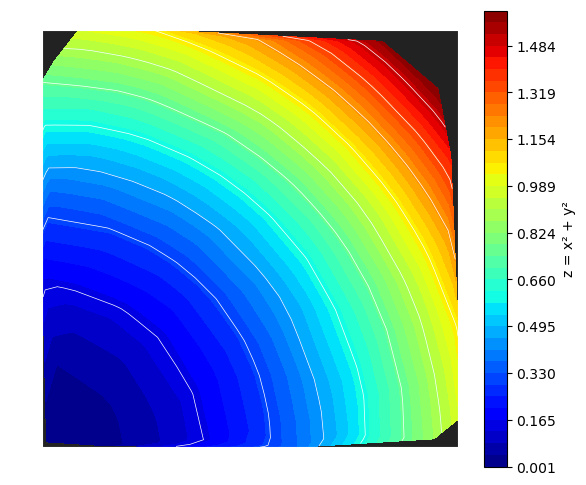

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import cm

# Données
N = 200
np.random.seed(42)
x = np.random.rand(N)
y = np.random.rand(N)
z = x**2 + y**2

triang = tri.Triangulation(x, y)

# Figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.set_facecolor('#222222')  # fond sombre pour contraste

# Trame des triangles en blanc très fin
ax.triplot(triang, lw=0.2, color='white', alpha=0.3)

# Remplissage lissé
levels = np.linspace(z.min(), z.max(), 40)
cmap = matplotlib.colormaps['jet']
cf = ax.tricontourf(triang, z, levels=levels, cmap=cmap)

# Lignes de niveaux
contours = ax.tricontour(triang, z, levels=10, colors='white', linewidths=0.5)

# Barres de couleur
cbar = fig.colorbar(cf, ax=ax, shrink=0.8)
cbar.set_label("z = x² + y²")

# Titre
ax.set_title("Carte de niveaux (tricontourf)", fontsize=12, color='white')

# Amélioration esthétique
ax.tick_params(colors='white')
cbar.ax.yaxis.set_tick_params(color='black')
for spine in ax.spines.values():
    spine.set_color('white')

plt.tight_layout()
plt.show()
